What need:
1) Forward Problem: Solve the heat equation using FDM (Euler or Thomas methods) to find the temperature distribution u(x,T) at a later time T given the initial condition f(x).

2) Inverse Problem: Use the temperature distribution u(x,T) (which will be noisy) to recover the initial condition f(x) using Tikhonov regularization.


Forward Problem:
1. Implement forward problem calculation +
2. Add noise to u(x,T) fot further use in the Inverse Problem +
3. Plot noisy and real u(x,T) +

Inverse Problem:
1. Implement Inverse problem estimation using Tichonov regularization +
2. Play with different λ values +
3. Plot the true initial condition, and the recovered initial condition using Tikhonov regularization for comparison +

#### Euler method, keep in mind about CFL condition.

PS: "+" synbol it means I did it. Don't pay attention to it. This is done for my convenience

### Heat equation:
∂u(x,t) / ∂t = α * ( ∂^2^u(x,t) / ∂x^2^ ) + f(x, t)
f(x, t) - external influence
α - coefficient of thermal conductivity (constant)
u(x,t) - temperature at point x at time t
where x = [0, L], t = [0, T]

### Boundary condition:
u(0, t) = u(L, t) = 0 (when x = 0 and x = L temperature is equal to 0)

### Initial condition:
u(x, 0) = f(x) - so, i don't understand it normally (the temperature distribution f(x) along the rod at time t = 0)

### CMF condition:
 r = α * dt / dx^2^

### Spatial Diser:
 dx = L / n - 1,
 where n - amount of step in grid (or space)? or amount of points

### Time Diser:
 dt = T / m - 1 (I'm not sure about m - 1, think we don't need to subtract 1)




In [26]:
import numpy as np
import matplotlib.pyplot as plt

### In Lecture Given Parameters

In [2]:
T = 0.1 # time
L = 1.0 # lentgth
alpha = 0.01 # k / c * ro
noise_level = 0.01 # noise of order 10^-2
lambda_values = [0.0001, 0.01, 0.1, 1.0] # different lambda values

### Initial function:
    f(x) = sin(Pi * X)

In [3]:
def fun(x):
    return np.sin(np.pi * x)

### Grid Method:
construct the grid over the domain = (0, L) * (0, T)

In [4]:
Xn = 50
Tn = 100
dx = L / (Xn - 1) # step X (Horizontal)
dt = T / (Tn - 1) # step T (Vertical)

In [5]:
print(f"dx: {dx}, dt: {dt}")

dx: 0.02040816326530612, dt: 0.00101010101010101


In [6]:
r = alpha * dt / dx**2

### We need some condition for CMF (r):
1. We know, we have some grid and layers (time layers, horizontal layers)
2. Named this layers J

Formula of scheme Euler:
    J<sup>t + 1</sup><sub>i</sub> = J<sup>t</sup><sub>i</sub> + r (J<sup>t</sup><sub>i + 1</sub> - 2J<sup>t</sup><sub>i</sub> + J<sup>t</sup><sub>i - 1</sub>)

by CFL condition r <= 0.5
so



In [7]:
=if r > 0.5:
    print("CFL condition not approved")
else:
    print(f"{r} < or = 0.5")

0.024252525252525258 < or = 0.5


### Construct grid

In [8]:
x = np.linspace(0, L, Xn) # from (0) to L, step = Xn (Horizontal axis)
t = np.linspace(0, T, Tn) # from (0) to T, step = Tn (Vertical axis)

In [9]:
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [10]:
t

array([0.        , 0.0010101 , 0.0020202 , 0.0030303 , 0.0040404 ,
       0.00505051, 0.00606061, 0.00707071, 0.00808081, 0.00909091,
       0.01010101, 0.01111111, 0.01212121, 0.01313131, 0.01414141,
       0.01515152, 0.01616162, 0.01717172, 0.01818182, 0.01919192,
       0.02020202, 0.02121212, 0.02222222, 0.02323232, 0.02424242,
       0.02525253, 0.02626263, 0.02727273, 0.02828283, 0.02929293,
       0.03030303, 0.03131313, 0.03232323, 0.03333333, 0.03434343,
       0.03535354, 0.03636364, 0.03737374, 0.03838384, 0.03939394,
       0.04040404, 0.04141414, 0.04242424, 0.04343434, 0.04444444,
       0.04545455, 0.04646465, 0.04747475, 0.04848485, 0.04949495,
       0.05050505, 0.05151515, 0.05252525, 0.05353535, 0.05454545,
       0.05555556, 0.05656566, 0.05757576, 0.05858586, 0.05959596,
       0.06060606, 0.06161616, 0.06262626, 0.06363636, 0.06464646,
       0.06565657, 0.06666667, 0.06767677, 0.06868687, 0.06969697,
       0.07070707, 0.07171717, 0.07272727, 0.07373737, 0.07474

### Example of future grid

Text(0.5, 0, 'X values')

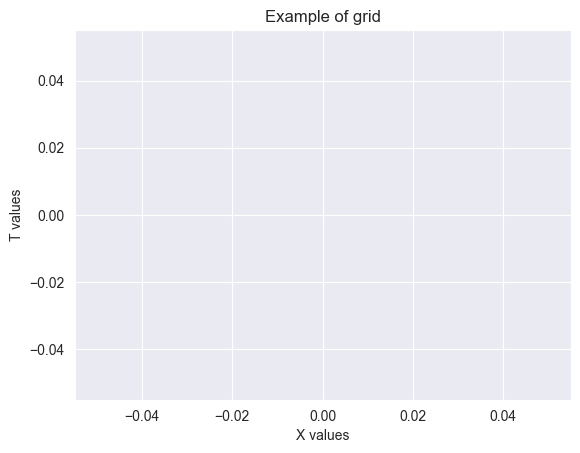

In [11]:
plt.plot()
plt.title("Example of grid")
plt.grid(visible=True)
plt.ylabel("T values")
plt.xlabel("X values")

In [12]:
# we need create a grid and put zeros to values in our grid
J = np.zeros((Tn, Xn)) # in this situation we create a grid with Xn amount of variables of X axis, and the same with Tn of Y axis

In [13]:
J

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
J[0, :] = fun(x)

In [15]:
J

array([[0.00000000e+00, 6.40702200e-02, 1.27877162e-01, ...,
        1.27877162e-01, 6.40702200e-02, 1.22464680e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### Using this Euler formula like i write earlier:
J<sup>t + 1</sup><sub>i</sub> = J<sup>t</sup><sub>i</sub> + r (J<sup>t</sup><sub>i + 1</sub> - 2J<sup>t</sup><sub>i</sub> + J<sup>t</sup><sub>i - 1</sub>)

In [16]:
for t in range(0, Tn-1):
    for i in range(1, Xn-1):
        J[t+1, i] = J[t, i] + r * (J[t, i-1] - 2*J[t, i] + J[t, i+1])

In [17]:
J # And we construct our grid

array([[0.00000000e+00, 6.40702200e-02, 1.27877162e-01, ...,
        1.27877162e-01, 6.40702200e-02, 1.22464680e-16],
       [0.00000000e+00, 6.40638348e-02, 1.27864418e-01, ...,
        1.27864418e-01, 6.40638348e-02, 0.00000000e+00],
       [0.00000000e+00, 6.40574503e-02, 1.27851675e-01, ...,
        1.27851675e-01, 6.40574503e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 6.34538126e-02, 1.26646880e-01, ...,
        1.26646880e-01, 6.34538126e-02, 0.00000000e+00],
       [0.00000000e+00, 6.34474889e-02, 1.26634258e-01, ...,
        1.26634258e-01, 6.34474889e-02, 0.00000000e+00],
       [0.00000000e+00, 6.34411658e-02, 1.26621638e-01, ...,
        1.26621638e-01, 6.34411658e-02, 0.00000000e+00]])

### Add some noise:
    J_noisy = J(x, T) + noise
    where noise = 0.01 (Noise level) * some random numbers, but the amount like in Xn
    I multiply to some randoms numbers for some different numbers.
    How you said in Video of Lecture 2

In [18]:
J_noisy = J[-1, :] + noise_level * np.random.normal(size=Xn)
# J [-1, :] all X elements by last time of grid (last T Layer)

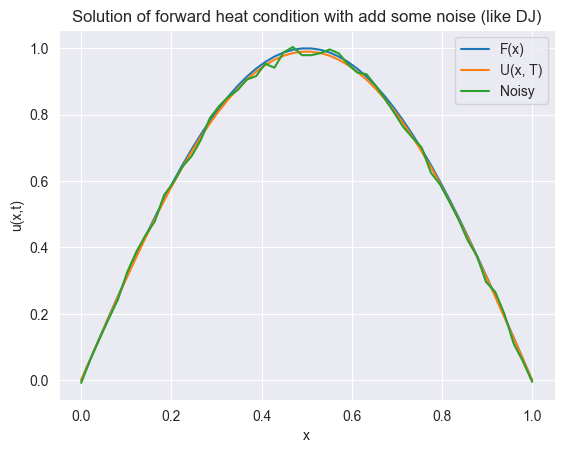

In [19]:
plt.plot(x, J[0, :], label="F(x)")
plt.plot(x, J[-1, :], label="U(x, T)")
plt.plot(x, J_noisy, label="Noisy")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Solution of forward heat condition with add some noise (like DJ)")
plt.legend()

### Now, Inverse

Tikhonov Regularization from lab_1

In [20]:
def tikhonov_regularization(A, y, L):
    AT = np.transpose(A)
    AT_A = np.matmul(AT, A)

    # add regularization parameter lambdaI
    AT_A += L * np.eye(AT_A.shape[0])  # lambdaI, like in this code we creating an identity matrix with size like AT_A matrix

    # (A^T * A + λI)^(-1)
    AT_A_inv = np.linalg.inv(AT_A)

    # (A^T * A + λI)^(-1) * A^T * y
    AT_y = np.matmul(AT, y)
    return np.matmul(AT_A_inv, AT_y)

### Create A Matrix and fill it

    | [1-2r] [  r ] [  0 ] [  0 ] [  0 ] |
    | [  r ] [1-2r] [  r ] [  0 ] [  0 ] |
    | [  0 ] [  r ] [1-2r] [  r ] [  0 ] |
    | [  0 ] [  0 ] [  r ] [1-2r] [  r ] |
    | [  0 ] [  0 ] [  0 ] [  r ] [1-2r] |

In [21]:
A = np.zeros((Xn, Xn))
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
np.fill_diagonal(A[1:, :], r)
A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02425253, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02425253, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02425253, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02425253,
        0.        ]])

In [23]:
np.fill_diagonal(A[:, 1:], r)
A

array([[0.        , 0.02425253, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02425253, 0.        , 0.02425253, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02425253, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.02425253,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02425253, 0.        ,
        0.02425253],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02425253,
        0.        ]])

In [24]:
np.fill_diagonal(A, 1 - 2 * r)
A

array([[0.95149495, 0.02425253, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02425253, 0.95149495, 0.02425253, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02425253, 0.95149495, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.95149495, 0.02425253,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02425253, 0.95149495,
        0.02425253],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02425253,
        0.95149495]])

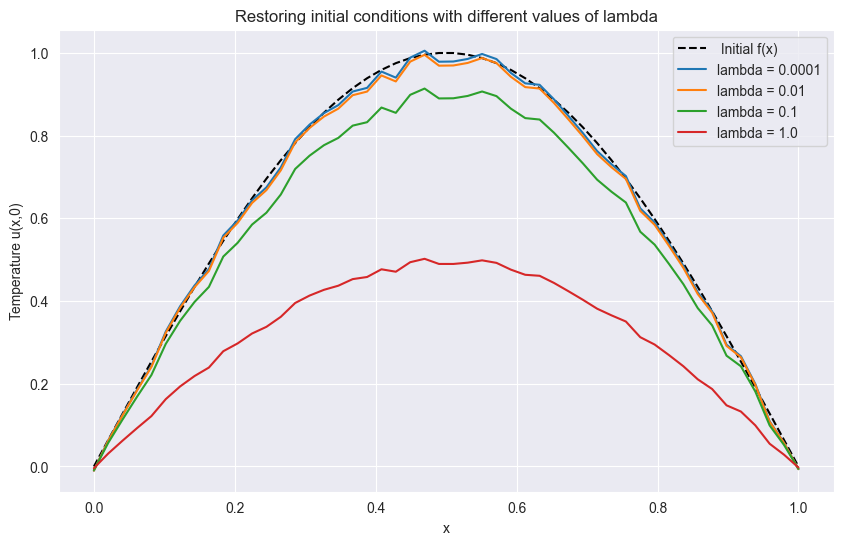

In [25]:
plt.figure(figsize=(10, 6)) # window for clearly plot and usability hehe
plt.plot(x, fun(x), label=" Initial f(x)", color='black', linestyle='--')

plt.xlabel("x")
plt.ylabel("Temperature u(x,0)")
plt.title("Restoring initial conditions with different values of lambda")

for L in lambda_values:
    regularized_function = tikhonov_regularization(A, J_noisy, L) # so we tried to repeat our initial function or condition
    plt.plot(x, regularized_function, label=f"lambda = {L}") # Plotting (and now i'm really tired to do this)

plt.legend()